# Turbofan Engine Degradation Simulation

## 1) Installing required libraries

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


## 2. Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Loading dataset and assigning header names to the columns

In [3]:
# header names to the columns
# with total of 26 columns
# 1) column: unit number
# 2) column: time, in cycles
# 3-5) operational settings
# 6-26) sensor measurements
columns = ['unit_number', 'time_in_cycles']+[f'operational_setting_{i}' for i in range(1,4)]+[f'sensor_measurement_{j}' for j in range(1,22)]

# load data
train_fd001 = pd.read_csv(r"C:\Users\vemul\Turbofan_Project\Turbofan Engine Degradation Simulation Data Set\train_FD001.txt", sep = '\s+', header = None, names = columns)
test_fd001  = pd.read_csv(r"C:\Users\vemul\Turbofan_Project\Turbofan Engine Degradation Simulation Data Set\test_FD001.txt", sep = '\s+', header = None, names = columns)
rul_fd001   = pd.read_csv(r"C:\Users\vemul\Turbofan_Project\Turbofan Engine Degradation Simulation Data Set\RUL_FD001.txt", sep = '\s+', header = None, names = ['RUL'])

## 4. Checking the dataset

4.1 Summary of the datasets

In [4]:
# for test dataset
print(print('Summary of train dataset'))
print(train_fd001.info())

Summary of train dataset
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            20631 non-null  int64  
 1   time_in_cycles         20631 non-null  int64  
 2   operational_setting_1  20631 non-null  float64
 3   operational_setting_2  20631 non-null  float64
 4   operational_setting_3  20631 non-null  float64
 5   sensor_measurement_1   20631 non-null  float64
 6   sensor_measurement_2   20631 non-null  float64
 7   sensor_measurement_3   20631 non-null  float64
 8   sensor_measurement_4   20631 non-null  float64
 9   sensor_measurement_5   20631 non-null  float64
 10  sensor_measurement_6   20631 non-null  float64
 11  sensor_measurement_7   20631 non-null  float64
 12  sensor_measurement_8   20631 non-null  float64
 13  sensor_measurement_9   20631 non-null  float64
 14  sensor_measurement_10  2

In [5]:
# for test dataset
print(print('Summary of train dataset'))
print(test_fd001.info())

Summary of train dataset
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            13096 non-null  int64  
 1   time_in_cycles         13096 non-null  int64  
 2   operational_setting_1  13096 non-null  float64
 3   operational_setting_2  13096 non-null  float64
 4   operational_setting_3  13096 non-null  float64
 5   sensor_measurement_1   13096 non-null  float64
 6   sensor_measurement_2   13096 non-null  float64
 7   sensor_measurement_3   13096 non-null  float64
 8   sensor_measurement_4   13096 non-null  float64
 9   sensor_measurement_5   13096 non-null  float64
 10  sensor_measurement_6   13096 non-null  float64
 11  sensor_measurement_7   13096 non-null  float64
 12  sensor_measurement_8   13096 non-null  float64
 13  sensor_measurement_9   13096 non-null  float64
 14  sensor_measurement_10  1

4.2 Descriptive statistics

In [6]:
# describe
print('Descriptive statistics of train dataset')
print(train_fd001.describe())

Descriptive statistics of train dataset
        unit_number  time_in_cycles  operational_setting_1  \
count  20631.000000    20631.000000           20631.000000   
mean      51.506568      108.807862              -0.000009   
std       29.227633       68.880990               0.002187   
min        1.000000        1.000000              -0.008700   
25%       26.000000       52.000000              -0.001500   
50%       52.000000      104.000000               0.000000   
75%       77.000000      156.000000               0.001500   
max      100.000000      362.000000               0.008700   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
count           20631.000000                20631.0          2.063100e+04   
mean                0.000002                  100.0          5.186700e+02   
std                 0.000293                    0.0          6.537152e-11   
min                -0.000600                  100.0          5.186700e+02   
25%             

In [7]:
# describe
print('Descriptive statistics of test dataset')
print(test_fd001.describe())

Descriptive statistics of test dataset
        unit_number  time_in_cycles  operational_setting_1  \
count  13096.000000    13096.000000           13096.000000   
mean      51.543907       76.836515              -0.000011   
std       28.289423       53.057749               0.002203   
min        1.000000        1.000000              -0.008200   
25%       28.000000       33.000000              -0.001500   
50%       52.000000       69.000000              -0.000000   
75%       76.000000      113.000000               0.001500   
max      100.000000      303.000000               0.007800   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
count           13096.000000                13096.0          1.309600e+04   
mean                0.000004                  100.0          5.186700e+02   
std                 0.000294                    0.0          6.014263e-11   
min                -0.000600                  100.0          5.186700e+02   
25%              

4.3 Checking shape of the dataset. To check whether the no. of columns in both train and test are same

In [8]:
print("Shape of the train dataset:", train_fd001.shape)
print("Shape of the test dataset:", test_fd001.shape)
print("Shape of the RUL dataset:", rul_fd001.shape)

Shape of the train dataset: (20631, 26)
Shape of the test dataset: (13096, 26)
Shape of the RUL dataset: (100, 1)


## 5. Data Wrangling

5.1 Checking for missing values

In [9]:
print("No. of missing values in train dataset:", train_fd001.isnull().sum())
print("No. of missing values in test dataset:", test_fd001.isnull().sum())
print("No. of missing values in RUL dataset:", rul_fd001.isnull().sum())

No. of missing values in train dataset: unit_number              0
time_in_cycles           0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measurement_3     0
sensor_measurement_4     0
sensor_measurement_5     0
sensor_measurement_6     0
sensor_measurement_7     0
sensor_measurement_8     0
sensor_measurement_9     0
sensor_measurement_10    0
sensor_measurement_11    0
sensor_measurement_12    0
sensor_measurement_13    0
sensor_measurement_14    0
sensor_measurement_15    0
sensor_measurement_16    0
sensor_measurement_17    0
sensor_measurement_18    0
sensor_measurement_19    0
sensor_measurement_20    0
sensor_measurement_21    0
dtype: int64
No. of missing values in test dataset: unit_number              0
time_in_cycles           0
operational_setting_1    0
operational_setting_2    0
operational_setting_3    0
sensor_measurement_1     0
sensor_measurement_2     0
sensor_measuremen

Observation: There are no missing values represent in all datasets

For training data, compute RUL as the difference between the maximum cycle and current cycle for each engine

In [10]:
# Calculate max cycles per engine
max_cycles_train = train_fd001.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles_train.columns = ['unit_number', 'max_cycles']

# Merge and compute RUL
train_fd001 = train_fd001.merge(max_cycles_train, on='unit_number')
train_fd001['RUL'] = train_fd001['max_cycles'] - train_fd001['time_in_cycles']
train_fd001 = train_fd001.drop('max_cycles', axis=1)

In [11]:
train_fd001.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [12]:
rul_fd001['unit_number'] = range(1,101)

In [13]:
rul_fd001.head()

,RUL,unit_number
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [14]:
# Calculate max cycles per engine
max_cycles_test = test_fd001.groupby('unit_number')['time_in_cycles'].max().reset_index()
max_cycles_test.columns = ['unit_number', 'max_cycles']

# Merge and compute RUL
test_fd001 = test_fd001.merge(max_cycles_test, on='unit_number')
test_fd001 = pd.merge(test_fd001, rul_fd001, on = 'unit_number')
test_fd001['RUL_test'] = test_fd001['RUL'] + test_fd001['max_cycles'] - test_fd001['time_in_cycles']
test_fd001 = test_fd001.drop('max_cycles', axis=1)

In [15]:
test_fd001.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL,RUL_test
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,112,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,112,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,112,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,112,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,112,138


## 6. Normalizing

In [16]:
from sklearn.preprocessing import MinMaxScaler

features = [f'operational_setting_{i}' for i in range(1,4)] + [f'sensor_measurement_{j}' for j in range(1, 22)]
scaler = MinMaxScaler()
train_fd001[features] = scaler.fit_transform(train_fd001[features])
test_fd001[features] = scaler.transform(test_fd001[features])

In [17]:
# Normalized train data
train_fd001.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187


In [18]:
# Normalized test data
test_fd001.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL,RUL_test
0,1,1,0.632184,0.750000,0.0,0.0,0.545181,0.310661,0.269413,0.0,...,0.132160,0.308965,0.0,0.333333,0.0,0.0,0.558140,0.661834,112,142
1,1,2,0.344828,0.250000,0.0,0.0,0.150602,0.379551,0.222316,0.0,...,0.204768,0.213159,0.0,0.416667,0.0,0.0,0.682171,0.686827,112,141
2,1,3,0.517241,0.583333,0.0,0.0,0.376506,0.346632,0.322248,0.0,...,0.155640,0.458638,0.0,0.416667,0.0,0.0,0.728682,0.721348,112,140
3,1,4,0.741379,0.500000,0.0,0.0,0.370482,0.285154,0.408001,0.0,...,0.170090,0.257022,0.0,0.250000,0.0,0.0,0.666667,0.662110,112,139
4,1,5,0.580460,0.500000,0.0,0.0,0.391566,0.352082,0.332039,0.0,...,0.152751,0.300885,0.0,0.166667,0.0,0.0,0.658915,0.716377,112,138


Removing common columns in dataset

In [19]:
constant_cols = [col for col in train_fd001.columns if train_fd001[col].nunique() == 1]
train_fd001 = train_fd001.drop(constant_cols, axis=1)
test_fd001 = test_fd001.drop(constant_cols, axis=1)

In [20]:
train_fd001.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_11,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_17,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187


## 7. EDA (Exploratory Data Analysis)

7.1 RUL Distribution of training data

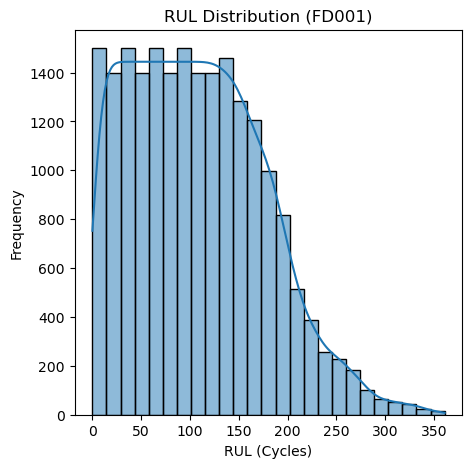

In [21]:
plt.figure(figsize = (5, 5))
sns.histplot(train_fd001['RUL'], bins = 25, kde = True)
plt.title("RUL Distribution (FD001)")
plt.xlabel("RUL (Cycles)")
plt.ylabel("Frequency")
plt.show()

7.2 Sensor measurement readings of the engine

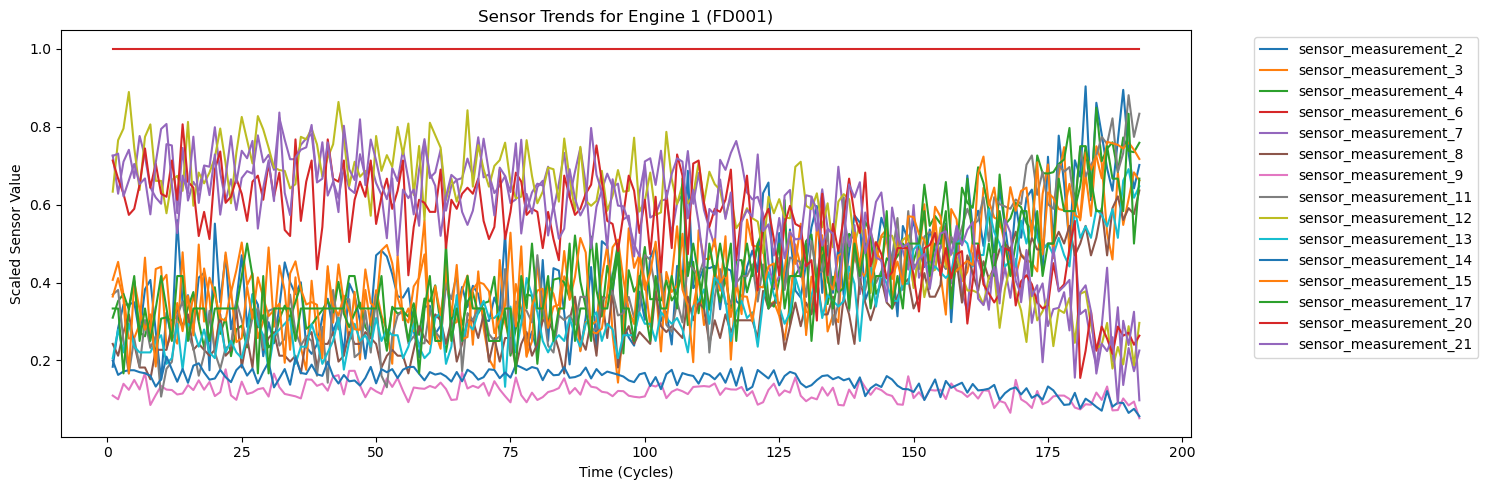

In [22]:
engine_id = 1
engine_data = train_fd001[train_fd001['unit_number'] == engine_id]

plt.figure(figsize = (15, 5))
sensor_readings = [col for col in train_fd001.columns if col.startswith('sensor_measurement_')]
for sensor in sensor_readings:
    plt.plot(engine_data['time_in_cycles'], engine_data[sensor], label=sensor)
plt.title(f'Sensor Trends for Engine {engine_id} (FD001)')
plt.xlabel('Time (Cycles)')
plt.ylabel('Scaled Sensor Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


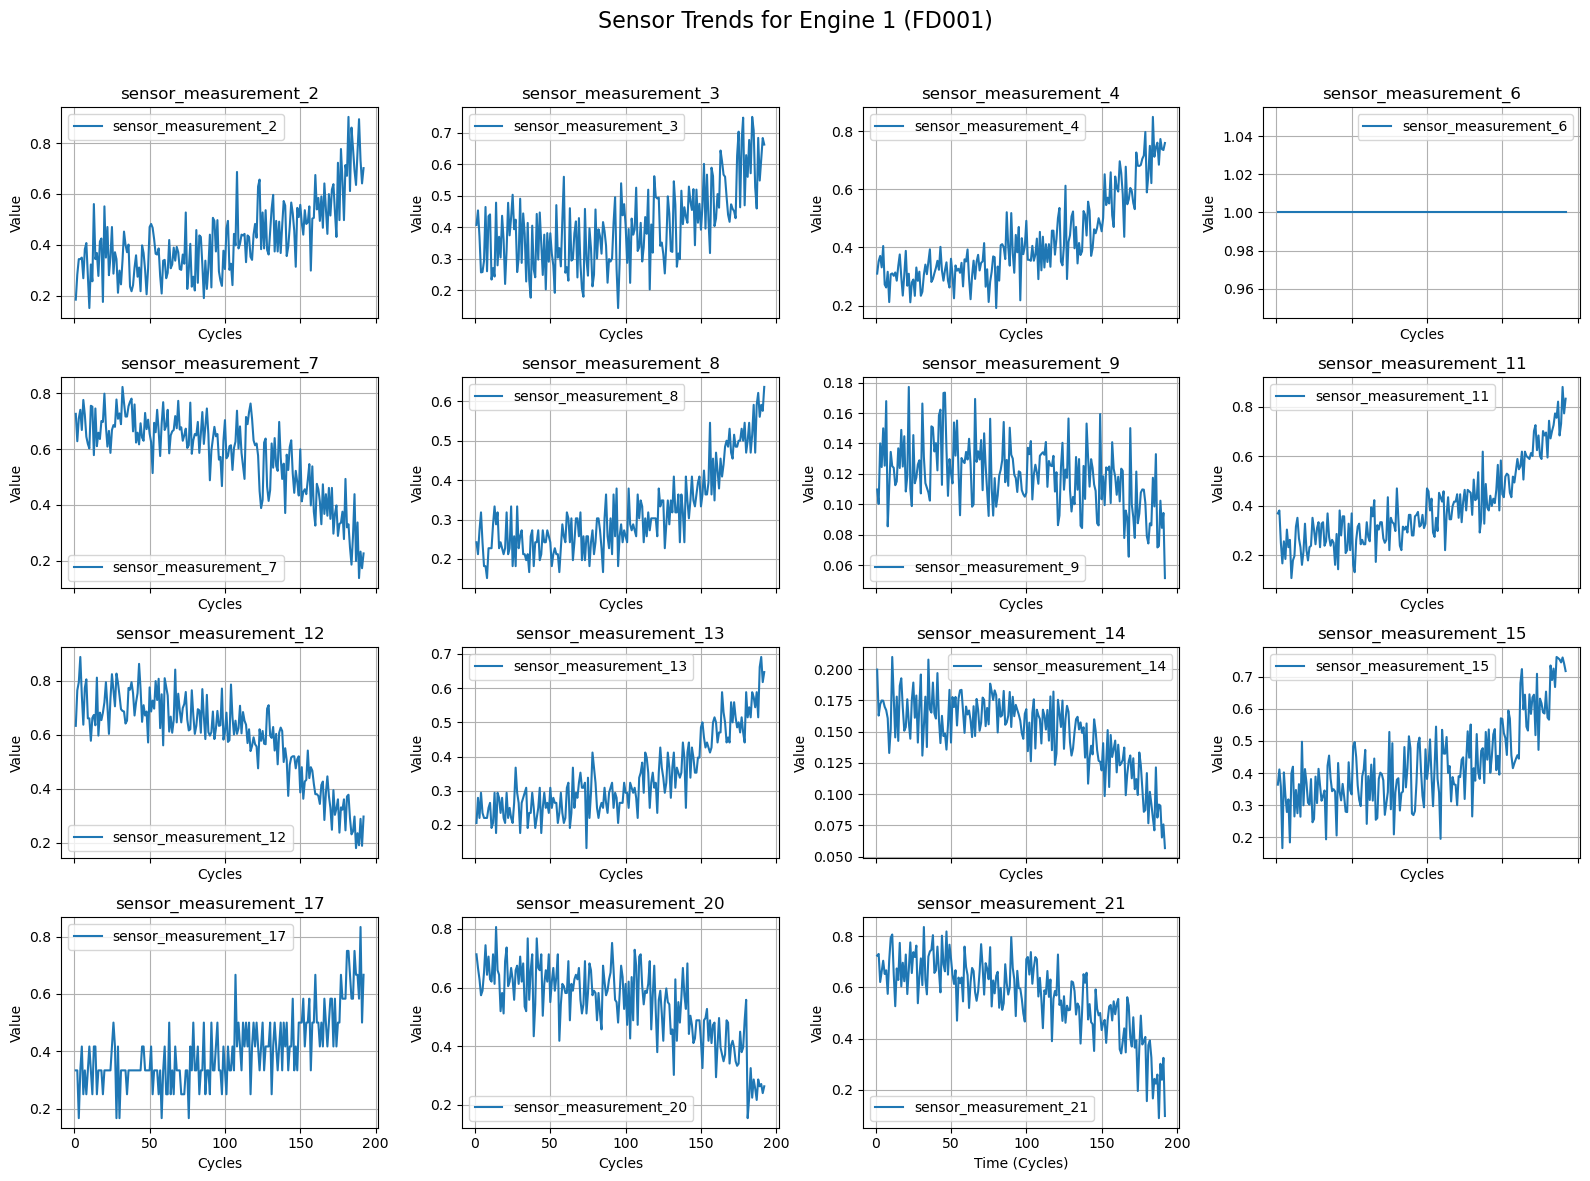

In [23]:

import math

engine_id = 1
engine_data = train_fd001[train_fd001['unit_number'] == engine_id]

# Get sensor columns
sensor_readings = [col for col in train_fd001.columns if col.startswith('sensor_measurement_')]

# Define subplot layout: 4 rows, dynamic columns
num_sensors = len(sensor_readings)
rows = 4
cols = math.ceil(num_sensors / rows)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 12), sharex=True)
fig.suptitle(f'Sensor Trends for Engine {engine_id} (FD001)', fontsize=16)

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each sensor
for i, sensor in enumerate(sensor_readings):
    ax = axes[i]
    ax.plot(engine_data['time_in_cycles'], engine_data[sensor], label=sensor, color='tab:blue')
    ax.set_title(sensor)
    ax.set_xlabel('Cycles')
    ax.set_ylabel('Value')
    ax.grid(True)
    ax.legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Final layout adjustments
plt.xlabel('Time (Cycles)')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()


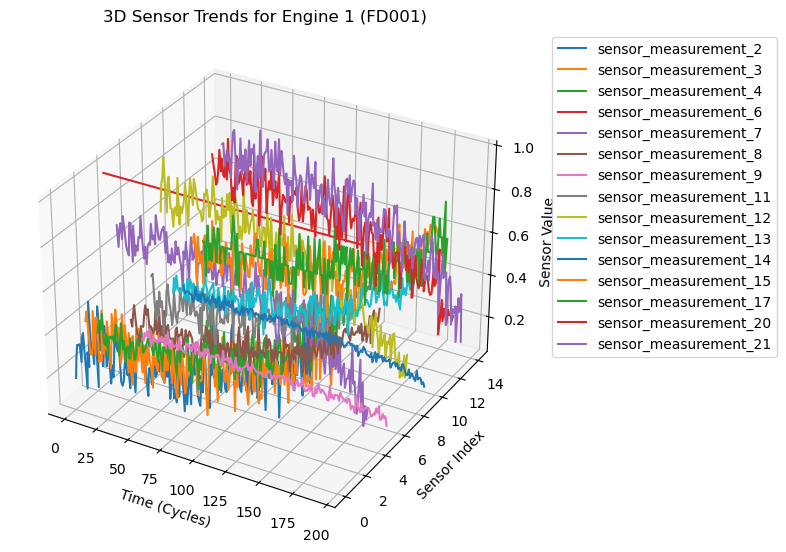

In [24]:
from mpl_toolkits.mplot3d import Axes3D

engine_id = 1
engine_data = train_fd001[train_fd001['unit_number'] == engine_id]

# Get list of sensor columns
sensor_readings = [col for col in train_fd001.columns if col.startswith('sensor_measurement_')]

# Prepare data for 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

time = engine_data['time_in_cycles'].values
sensor_indices = np.arange(len(sensor_readings))

for i, sensor in enumerate(sensor_readings):
    values = engine_data[sensor].values
    y = np.full_like(time, sensor_indices[i])  # Sensor index on Y-axis
    ax.plot(time, y, values, label=sensor)     # Sensor value on Z-axis

ax.set_xlabel('Time (Cycles)')
ax.set_ylabel('Sensor Index')
ax.set_zlabel('Sensor Value')
ax.set_title(f'3D Sensor Trends for Engine {engine_id} (FD001)')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


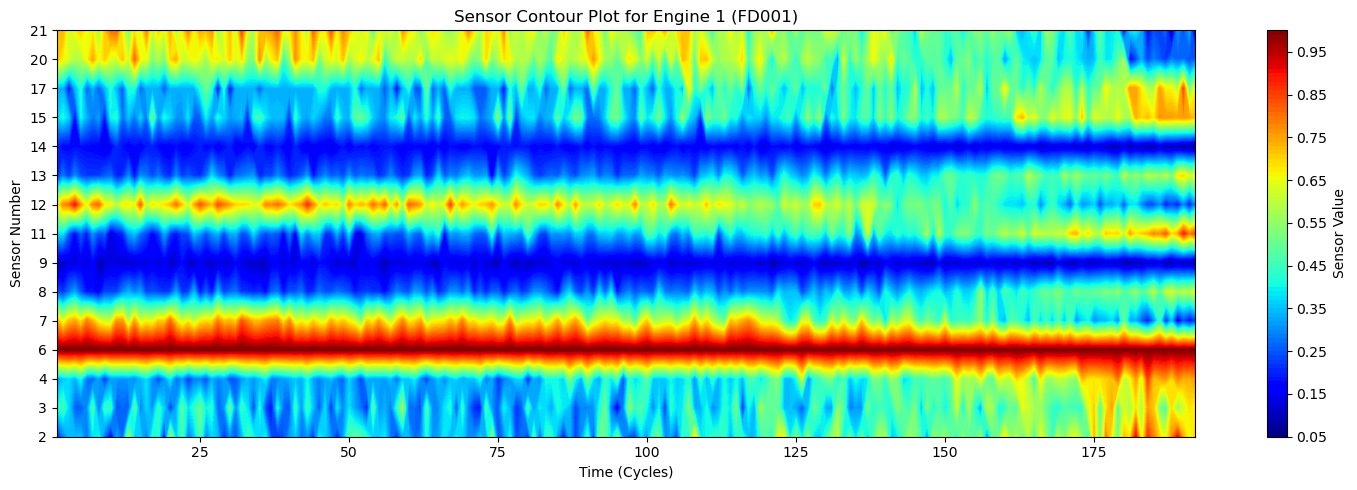

In [25]:

# Step 1: Extract sensor columns dynamically
sensor_readings = train_fd001.columns[train_fd001.columns.str.startswith('sensor_measurement_')].tolist()

# Step 2: Filter data for a specific engine
engine_id = 1
engine_data = train_fd001[train_fd001['unit_number'] == engine_id]

# Step 3: Create a 2D array: rows = sensors, columns = cycles
sensor_matrix = engine_data[sensor_readings].T.values  # Transpose to get sensors as rows

# Step 4: Create meshgrid for plotting
X, Y = np.meshgrid(engine_data['time_in_cycles'].values, range(len(sensor_readings)))

# Step 5: Extract just the sensor numbers for Y-axis labels
sensor_numbers = [label.split('_')[-1] for label in sensor_readings]

# Step 6: Plot contour-style heatmap
plt.figure(figsize=(15, 5))
contour = plt.contourf(X, Y, sensor_matrix, cmap='jet', levels=100)

# Step 7: Customize axes
plt.yticks(ticks=range(len(sensor_readings)), labels=sensor_numbers)
plt.xlabel('Time (Cycles)')
plt.ylabel('Sensor Number')
plt.title(f'Sensor Contour Plot for Engine {engine_id} (FD001)')
plt.colorbar(contour, label='Sensor Value')
plt.tight_layout()
plt.show()


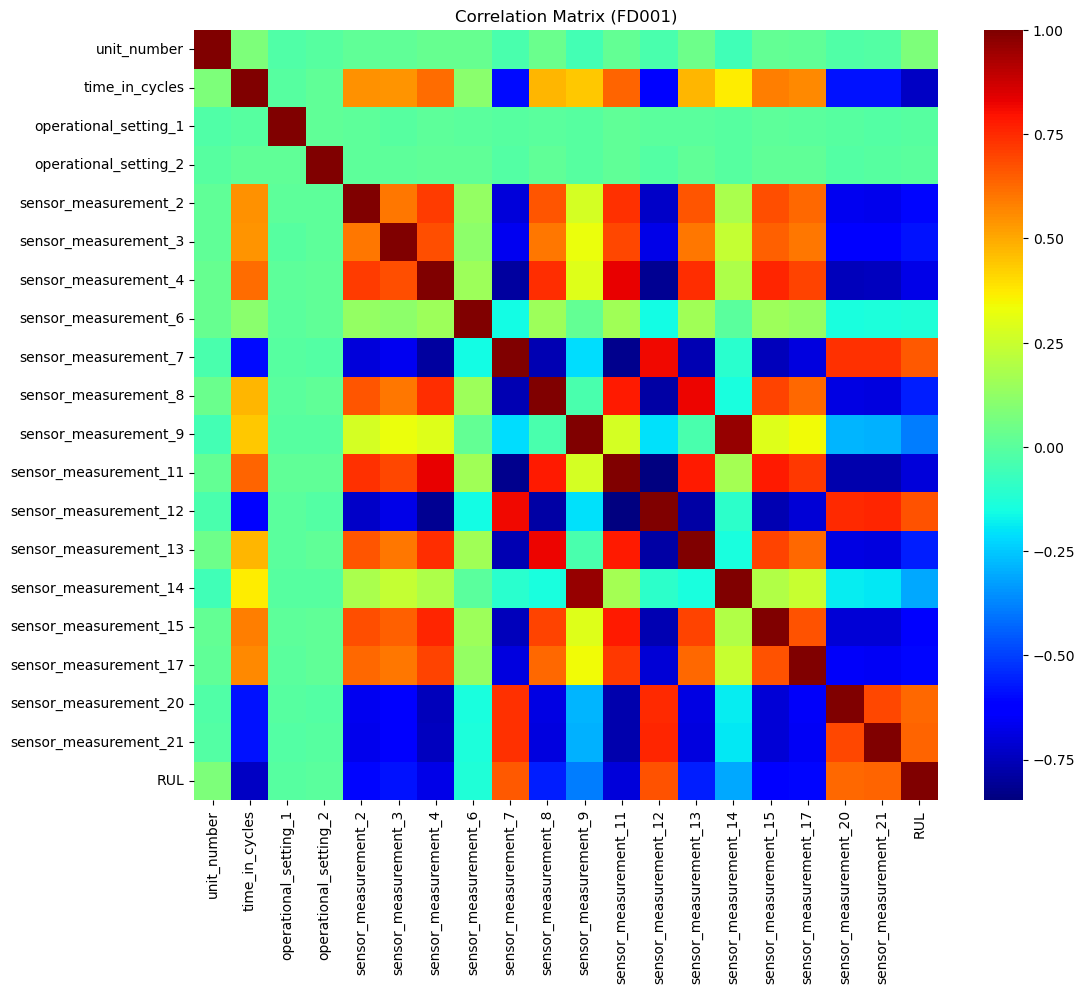

time_in_cycles          -0.736241
sensor_measurement_11   -0.696228
sensor_measurement_4    -0.678948
sensor_measurement_15   -0.642667
sensor_measurement_2    -0.606484
sensor_measurement_17   -0.606154
sensor_measurement_3    -0.584520
sensor_measurement_8    -0.563968
sensor_measurement_13   -0.562569
sensor_measurement_9    -0.390102
sensor_measurement_14   -0.306769
sensor_measurement_6    -0.128348
operational_setting_1   -0.003198
operational_setting_2   -0.001948
unit_number              0.078753
sensor_measurement_20    0.629428
sensor_measurement_21    0.635662
sensor_measurement_7     0.657223
sensor_measurement_12    0.671983
RUL                      1.000000
Name: RUL, dtype: float64


In [26]:
# correlation
plt.figure(figsize=(12, 10))
sns.heatmap(train_fd001.corr(), annot=False, cmap='jet')
plt.title('Correlation Matrix (FD001)')
plt.show()

rul_corr = train_fd001.corr()['RUL'].sort_values()
print(rul_corr)

## 8. Feature Engineering

8.1 Time-Based Features: Add polynomial or logarithmic features for cycles

In [27]:
train_fd001['cycle_squared'] = train_fd001['time_in_cycles'] ** 2
test_fd001['cycle_squared'] = test_fd001['time_in_cycles'] ** 2
train_fd001['log_cycles'] = np.log1p(train_fd001['time_in_cycles'])
test_fd001['log_cycles'] = np.log1p(test_fd001['time_in_cycles'])

8.2 Rolling Statistics

In [28]:
window_size = 5
sensor_readings = [col for col in train_fd001.columns if col.startswith('sensor_measurement_')]
for sensor in sensor_readings:
    train_fd001[f'{sensor}_roll_mean'] = train_fd001.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window_size, min_periods=1).mean())
    train_fd001[f'{sensor}_roll_std'] = train_fd001.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window_size, min_periods=1).std())
    test_fd001[f'{sensor}_roll_mean'] = test_fd001.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window_size, min_periods=1).mean())
    test_fd001[f'{sensor}_roll_std'] = test_fd001.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window_size, min_periods=1).std())

8.3 Sensor Difference

In [29]:
sensor_readings = [col for col in train_fd001.columns if col.startswith('sensor_measurement_')]
for sensor in sensor_readings:
    train_fd001[f'{sensor}_diff'] = train_fd001.groupby('unit_number')[sensor].diff().fillna(0)
    test_fd001[f'{sensor}_diff'] = test_fd001.groupby('unit_number')[sensor].diff().fillna(0)

In [30]:
train_fd001.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_6,sensor_measurement_7,sensor_measurement_8,...,sensor_measurement_14_roll_mean_diff,sensor_measurement_14_roll_std_diff,sensor_measurement_15_roll_mean_diff,sensor_measurement_15_roll_std_diff,sensor_measurement_17_roll_mean_diff,sensor_measurement_17_roll_std_diff,sensor_measurement_20_roll_mean_diff,sensor_measurement_20_roll_std_diff,sensor_measurement_21_roll_mean_diff,sensor_measurement_21_roll_std_diff
0,1,1,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,...,-0.018397,0.000000,0.023663,0.000000,0.000000,0.000000,-0.023256,0.000000,0.003176,0.000000
2,1,3,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,...,-0.003139,-0.006834,-0.010068,-0.004070,-0.055556,0.096225,-0.020672,0.009806,-0.035487,0.057057
3,1,4,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,...,-0.000796,-0.003440,-0.052745,0.078791,0.013889,-0.012892,-0.023902,0.016470,-0.007491,-0.009109
4,1,5,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,...,-0.000508,-0.002062,0.015448,-0.008329,0.025000,0.007954,-0.011240,-0.002094,0.003928,-0.006184


In [31]:
null_counts = train_fd001.isnull().sum()
missing = null_counts[null_counts > 0].to_frame(name='Null Count')
print(missing.to_string())

                                Null Count
sensor_measurement_2_roll_std          100
sensor_measurement_3_roll_std          100
sensor_measurement_4_roll_std          100
sensor_measurement_6_roll_std          100
sensor_measurement_7_roll_std          100
sensor_measurement_8_roll_std          100
sensor_measurement_9_roll_std          100
sensor_measurement_11_roll_std         100
sensor_measurement_12_roll_std         100
sensor_measurement_13_roll_std         100
sensor_measurement_14_roll_std         100
sensor_measurement_15_roll_std         100
sensor_measurement_17_roll_std         100
sensor_measurement_20_roll_std         100
sensor_measurement_21_roll_std         100


In [32]:
null_counts = test_fd001.isnull().sum()
missing = null_counts[null_counts > 0].to_frame(name='Null Count')
print(missing.to_string())

                                Null Count
sensor_measurement_2_roll_std          100
sensor_measurement_3_roll_std          100
sensor_measurement_4_roll_std          100
sensor_measurement_6_roll_std          100
sensor_measurement_7_roll_std          100
sensor_measurement_8_roll_std          100
sensor_measurement_9_roll_std          100
sensor_measurement_11_roll_std         100
sensor_measurement_12_roll_std         100
sensor_measurement_13_roll_std         100
sensor_measurement_14_roll_std         100
sensor_measurement_15_roll_std         100
sensor_measurement_17_roll_std         100
sensor_measurement_20_roll_std         100
sensor_measurement_21_roll_std         100


In [33]:
# Step 1: Identify columns with any NaNs
target_cols = train_fd001.columns[train_fd001.isna().any()].tolist()

# Step 2: Apply bfill with limit = mean of column (rounded)
for col in target_cols:
    train_fd001[col] = train_fd001[col].bfill()

# Step 3: Check remaining NaNs
print("Columns filled:", target_cols)
print("Remaining NaNs in each column:")
print(train_fd001[target_cols].isna().sum())

Columns filled: ['sensor_measurement_2_roll_std', 'sensor_measurement_3_roll_std', 'sensor_measurement_4_roll_std', 'sensor_measurement_6_roll_std', 'sensor_measurement_7_roll_std', 'sensor_measurement_8_roll_std', 'sensor_measurement_9_roll_std', 'sensor_measurement_11_roll_std', 'sensor_measurement_12_roll_std', 'sensor_measurement_13_roll_std', 'sensor_measurement_14_roll_std', 'sensor_measurement_15_roll_std', 'sensor_measurement_17_roll_std', 'sensor_measurement_20_roll_std', 'sensor_measurement_21_roll_std']
Remaining NaNs in each column:
sensor_measurement_2_roll_std     0
sensor_measurement_3_roll_std     0
sensor_measurement_4_roll_std     0
sensor_measurement_6_roll_std     0
sensor_measurement_7_roll_std     0
sensor_measurement_8_roll_std     0
sensor_measurement_9_roll_std     0
sensor_measurement_11_roll_std    0
sensor_measurement_12_roll_std    0
sensor_measurement_13_roll_std    0
sensor_measurement_14_roll_std    0
sensor_measurement_15_roll_std    0
sensor_measuremen

In [34]:
# Step 1: Identify columns with any NaNs
target_cols = test_fd001.columns[test_fd001.isna().any()].tolist()

# Step 2: Apply bfill with limit = mean of column (rounded)
for col in target_cols:
    test_fd001[col] = test_fd001[col].bfill()

# Step 3: Check remaining NaNs
print("Columns filled:", target_cols)
print("Remaining NaNs in each column:")
print(test_fd001[target_cols].isna().sum())

Columns filled: ['sensor_measurement_2_roll_std', 'sensor_measurement_3_roll_std', 'sensor_measurement_4_roll_std', 'sensor_measurement_6_roll_std', 'sensor_measurement_7_roll_std', 'sensor_measurement_8_roll_std', 'sensor_measurement_9_roll_std', 'sensor_measurement_11_roll_std', 'sensor_measurement_12_roll_std', 'sensor_measurement_13_roll_std', 'sensor_measurement_14_roll_std', 'sensor_measurement_15_roll_std', 'sensor_measurement_17_roll_std', 'sensor_measurement_20_roll_std', 'sensor_measurement_21_roll_std']
Remaining NaNs in each column:
sensor_measurement_2_roll_std     0
sensor_measurement_3_roll_std     0
sensor_measurement_4_roll_std     0
sensor_measurement_6_roll_std     0
sensor_measurement_7_roll_std     0
sensor_measurement_8_roll_std     0
sensor_measurement_9_roll_std     0
sensor_measurement_11_roll_std    0
sensor_measurement_12_roll_std    0
sensor_measurement_13_roll_std    0
sensor_measurement_14_roll_std    0
sensor_measurement_15_roll_std    0
sensor_measuremen

8.4 Feature Selection

In [42]:
from sklearn.ensemble import RandomForestRegressor

X = train_fd001[['unit_number', 'time_in_cycles', 'cycle_squared', 'log_cycles'] + [col for col in train_fd001.columns if col.startswith('sensor_measurement_')]]
y = train_fd001['RUL']
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)
feature_imp = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_}).sort_values('Importance', ascending=False)
print(feature_imp)

                                Feature  Importance
3                            log_cycles    0.216011
1                        time_in_cycles    0.161843
2                         cycle_squared    0.159138
0                           unit_number    0.144472
23       sensor_measurement_4_roll_mean    0.084323
..                                  ...         ...
26        sensor_measurement_6_roll_std    0.000076
70  sensor_measurement_6_roll_mean_diff    0.000018
71   sensor_measurement_6_roll_std_diff    0.000015
52            sensor_measurement_6_diff    0.000008
7                  sensor_measurement_6    0.000003

[94 rows x 2 columns]


Selecting top 20 features for further model training

In [43]:
top_features = feature_imp['Feature'].head(20).tolist()
print(top_features)

['log_cycles', 'time_in_cycles', 'cycle_squared', 'unit_number', 'sensor_measurement_4_roll_mean', 'sensor_measurement_11_roll_mean', 'sensor_measurement_15_roll_mean', 'sensor_measurement_9_roll_mean', 'sensor_measurement_14_roll_mean', 'sensor_measurement_12_roll_mean', 'sensor_measurement_7_roll_mean', 'sensor_measurement_13_roll_mean', 'sensor_measurement_21_roll_mean', 'sensor_measurement_8_roll_mean', 'sensor_measurement_2_roll_mean', 'sensor_measurement_3_roll_mean', 'sensor_measurement_9', 'sensor_measurement_20_roll_mean', 'sensor_measurement_7_roll_std', 'sensor_measurement_11_roll_std']


## 9. Building Machine Learning model

In [44]:
X_train = train_fd001[top_features]
y_train = train_fd001['RUL']
X_test = test_fd001[top_features]
y_test = test_fd001['RUL_test']  # Use last cycle RUL for evaluation

In [51]:
# Example: label as 1 if RUL ≤ 30 cycles, else 0
threshold = 30
y_train_cls = (y_train <= threshold).astype(int)
y_test_cls = (y_test <= threshold).astype(int)

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train_cls)
    y_pred_cls = model.predict(X_test)
    acc = accuracy_score(y_test_cls, y_pred_cls)
    results[name] = {
        'model': model,
Logistic Regression - Accuracy: 0.99
              precision    recall  f1-score   support

     Healthy       0.99      1.00      0.99     12764
     Warning       0.83      0.61      0.70       332

    accuracy                           0.99     13096
   macro avg       0.91      0.80      0.85     13096
weighted avg       0.99      0.99      0.99     13096

Random Forest - Accuracy: 0.99
              precision    recall  f1-score   support

     Healthy       0.99      1.00      0.99     12764
     Warning       0.78      0.65      0.71       332

    accuracy                           0.99     13096
   macro avg       0.89      0.82      0.85     13096
weighted avg       0.99      0.99      0.99     13096

C:\Users\vemul\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:00:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
XGBoost - Accuracy: 0.98
              precision    recall  f1-score   support

     Healthy       0.99      0.99      0.99     12764
     Warning       0.67      0.66      0.66       332

    accuracy                           0.98     13096
   macro avg       0.83      0.82      0.83     13096
weighted avg       0.98      0.98      0.98     13096        'accuracy': acc,
        'y_pred': y_pred_cls
    }
    print(f'{name} - Accuracy: {acc:.2f}')
    print(classification_report(y_test_cls, y_pred_cls, target_names=['Healthy', 'Warning']))

Logistic Regression - Accuracy: 0.99
              precision    recall  f1-score   support

     Healthy       0.99      1.00      0.99     12764
     Warning       0.83      0.61      0.70       332

    accuracy                           0.99     13096
   macro avg       0.91      0.80      0.85     13096
weighted avg       0.99      0.99      0.99     13096

Random Forest - Accuracy: 0.99
              precision    recall  f1-score   support

     Healthy       0.99      1.00      0.99     12764
     Warning       0.78      0.65      0.71       332

    accuracy                           0.99     13096
   macro avg       0.89      0.82      0.85     13096
weighted avg       0.99      0.99      0.99     13096



C:\Users\vemul\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:00:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost - Accuracy: 0.98
              precision    recall  f1-score   support

     Healthy       0.99      0.99      0.99     12764
     Warning       0.67      0.66      0.66       332

    accuracy                           0.98     13096
   macro avg       0.83      0.82      0.83     13096
weighted avg       0.98      0.98      0.98     13096



Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print(f'Best Params: {grid_search.best_params_}')

Deep learning

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np

# Prepare 3D data [samples, timesteps, features]
def create_sequences(data, seq_length=50):
    X, y = [], []
    for unit in data['unit_number'].unique():
        unit_data = data[data['unit_number'] == unit][top_features + ['RUL']]
        for i in range(len(unit_data) - seq_length):
            X.append(unit_data[top_features].iloc[i:i+seq_length].values)
            y.append(unit_data['RUL'].iloc[i+seq_length])
    return np.array(X), np.array(y)

X_train_seq, y_train_seq = create_sequences(train_fd001)
X_test_seq, y_test_seq = create_sequences(test_fd001)

model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_split=0.2)

Test

In [63]:
from sklearn.metrics import f1_score

# Find model with best F1 score for class 1 (Warning)
best_model_name = max(results, key=lambda k: f1_score(y_test_cls, results[k]['y_pred'], pos_label=1))
best_model = results[best_model_name]['model']
best_y_pred = results[best_model_name]['y_pred']
best_f1 = f1_score(y_test_cls, best_y_pred, pos_label=1)

print(f"\n✅ Best model by F1 score (Warning class): {best_model_name} with F1 score = {best_f1:.2f}")


✅ Best model by F1 score (Warning class): Random Forest with F1 score = 0.71


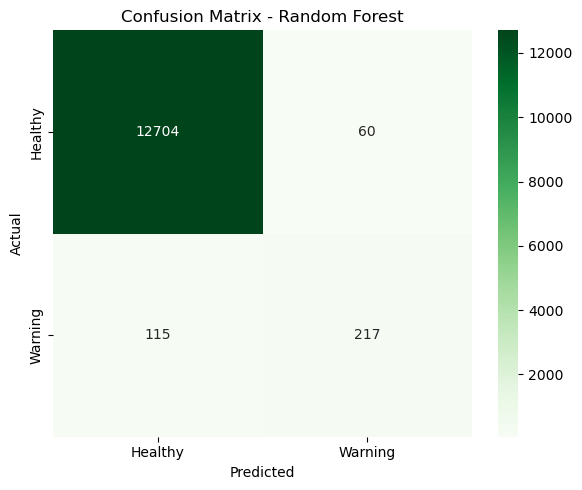

In [67]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_cls, best_y_pred)

# Plot it
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Healthy', 'Warning'],
            yticklabels=['Healthy', 'Warning'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.tight_layout()
plt.show()


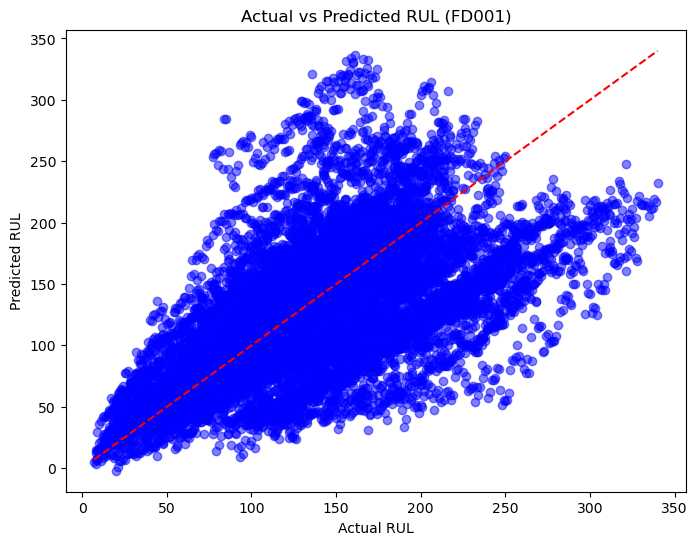

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color = 'blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.title('Actual vs Predicted RUL (FD001)')
plt.show()

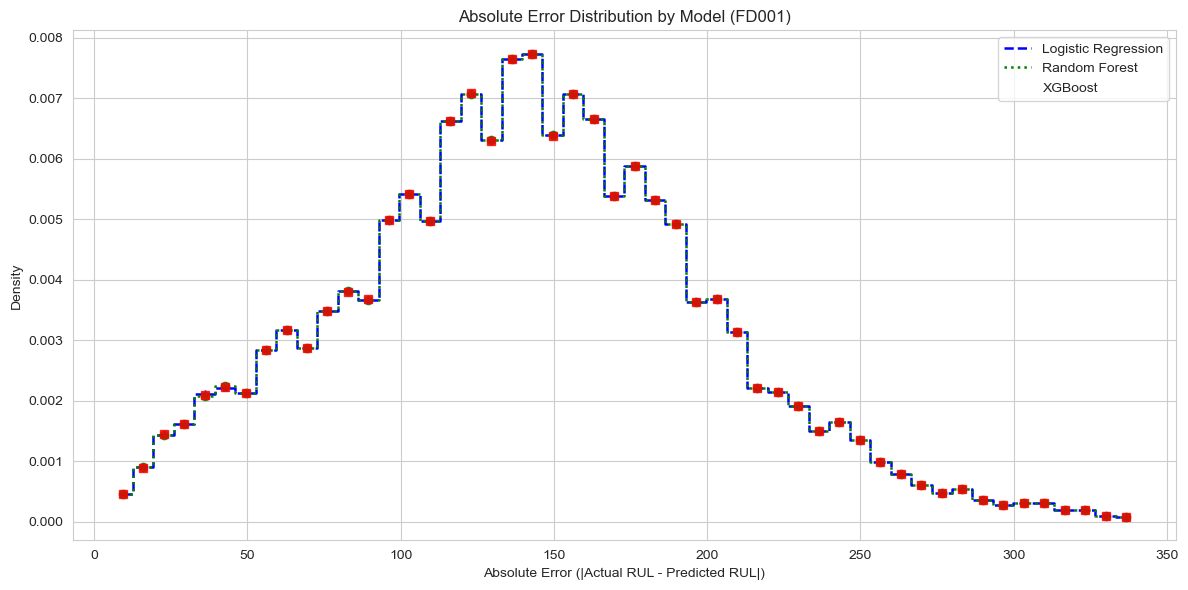

In [80]:

# Define colors and line styles for each model
styles = {
    'Logistic Regression': {'color': 'blue', 'linestyle': '--', 'marker': '*'},
    'Random Forest': {'color': 'green', 'linestyle': ':', 'marker': 'o'},
    'XGBoost': {'color': 'red', 'linestyle': '', 'marker': 's'}
}

plt.figure(figsize=(12, 6))

bins = 50
for name, model in models.items():
    y_pred = model.predict(X_test)
    errors = np.abs(y_test - y_pred)
    
    counts, bin_edges = np.histogram(errors, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plot step histogram with linestyle
    plt.step(bin_centers, counts, where='mid', 
             label=name, 
             color=styles[name]['color'], 
             linestyle=styles[name]['linestyle'], 
             linewidth=1.8)

    # Add markers at bin centers (optional)
    plt.plot(bin_centers, counts, marker=styles[name]['marker'], 
             linestyle='None', 
             color=styles[name]['color'], 
             markersize=6, alpha=0.8)

plt.title('Absolute Error Distribution by Model (FD001)')
plt.xlabel('Absolute Error (|Actual RUL - Predicted RUL|)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\vemul\AppData\Local\Temp\ipykernel_19460\1595602664.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='Greens')


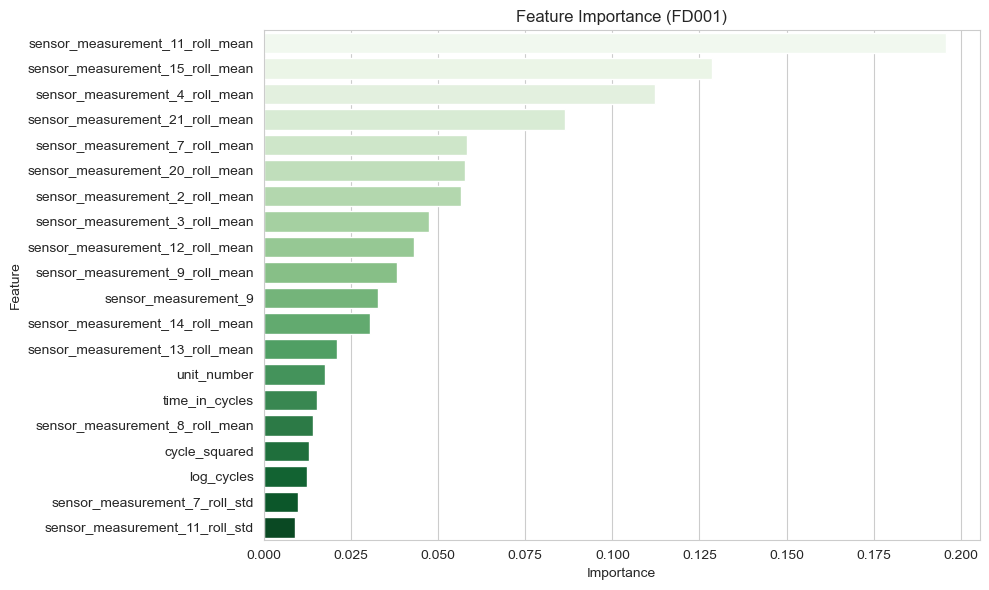

In [84]:
# Assuming 'top_features' is a list of feature names used in model
# and 'best_model' is fitted model with feature_importances_ attribute

feature_imp = pd.DataFrame({
    'Feature': top_features,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='Greens')
plt.title('Feature Importance (FD001)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Save model

In [85]:
import joblib
joblib.dump(best_model, 'models/fd001_rul_model.pkl')

['models/fd001_rul_model.pkl']